In [1]:
import pm4py
from pm4py.objects.conversion.log import converter as log_converter 
from pm4py.objects.log.importer.xes import importer as xes_importer

In [2]:
data = xes_importer.apply('../data/ArtificialPatientTreatmentOriginal.xes')

parsing log, completed traces ::   0%|          | 0/101 [00:00<?, ?it/s]

In [3]:
type(data)

pm4py.objects.log.obj.EventLog

In [4]:
print(len(data)) # so we have 101 traces of the log
data

101


[{'attributes': {'concept:name': 'patient 0'}, 'events': [{'concept:name': ' First consult', 'org:resource': ' Dr. Anna', 'time:timestamp': datetime.datetime(2017, 1, 2, 11, 40, 11)}, '..', {'concept:name': ' Final consult', 'org:resource': ' Dr. Ben', 'time:timestamp': datetime.datetime(2017, 1, 9, 8, 29, 28)}]}, '....', {'attributes': {'concept:name': 'patient 100'}, 'events': [{'concept:name': ' First consult', 'org:resource': ' Dr. Bob', 'time:timestamp': datetime.datetime(2017, 5, 18, 11, 57, 11)}, '..', {'concept:name': ' Final consult', 'org:resource': ' Dr. Anna', 'time:timestamp': datetime.datetime(2017, 5, 31, 12, 46, 43)}]}]

In [5]:
print(data[0]) #prints the first trace of the log
print(data[0][0]) #prints the first event of the first trace

{'attributes': {'concept:name': 'patient 0'}, 'events': [{'concept:name': ' First consult', 'org:resource': ' Dr. Anna', 'time:timestamp': datetime.datetime(2017, 1, 2, 11, 40, 11)}, '..', {'concept:name': ' Final consult', 'org:resource': ' Dr. Ben', 'time:timestamp': datetime.datetime(2017, 1, 9, 8, 29, 28)}]}
{'concept:name': ' First consult', 'org:resource': ' Dr. Anna', 'time:timestamp': datetime.datetime(2017, 1, 2, 11, 40, 11)}


In [6]:
df = pm4py.convert_to_dataframe(data)

In [7]:
df.head(15)

,concept:name,org:resource,time:timestamp,case:concept:name
0,First consult,Dr. Anna,2017-01-02 11:40:11,patient 0
1,Blood test,Lab,2017-01-02 12:47:33,patient 0
2,Physical test,Nurse Jesse,2017-01-02 12:53:50,patient 0
3,Second consult,Dr. Anna,2017-01-02 16:21:06,patient 0
4,Surgery,Dr. Charlie,2017-01-05 13:23:09,patient 0
5,Final consult,Dr. Ben,2017-01-09 08:29:28,patient 0
6,First consult,Dr. Anna,2017-01-02 12:50:35,patient 1
7,Physical test,Nurse Jesse,2017-01-02 13:59:14,patient 1
8,Blood test,Lab,2017-01-02 14:20:19,patient 1
9,X-ray scan,Team 1,2017-01-06 09:13:40,patient 1


In [8]:
df.groupby('case:concept:name').count() #ara diaxwrizontai ta traces me ena anagnwristiko to case:concept:name

,concept:name,org:resource,time:timestamp
case:concept:name,,,
patient 0,6,6,6
patient 1,7,7,7
patient 10,7,7,7
patient 100,7,7,7
patient 11,7,7,7
...,...,...,...
patient 95,6,6,6
patient 96,7,7,7
patient 97,7,7,7


### Construction of the log 
We can see that we have patients, each patient is one trace and we have events in each trace that all together correspond to the process that each patient went through when he visited the doctor

In [9]:
## Import the alpha_miner algorithm
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(data)

/Users/christoschristodoulou/projects/sample_project/env/lib/python3.8/site-packages/pm4py/visualization/petrinet/__init__.py:20: UserWarning: please use the pm4py.visualization.petri_net package instead
  warnings.warn("please use the pm4py.visualization.petri_net package instead")
/var/folders/wk/yjvhdpj533sgm01jhb0gwj7w0000gn/T/ipykernel_49654/1087869741.py:5: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  gviz = pn_visualizer.apply(net, initial_marking, final_marking)


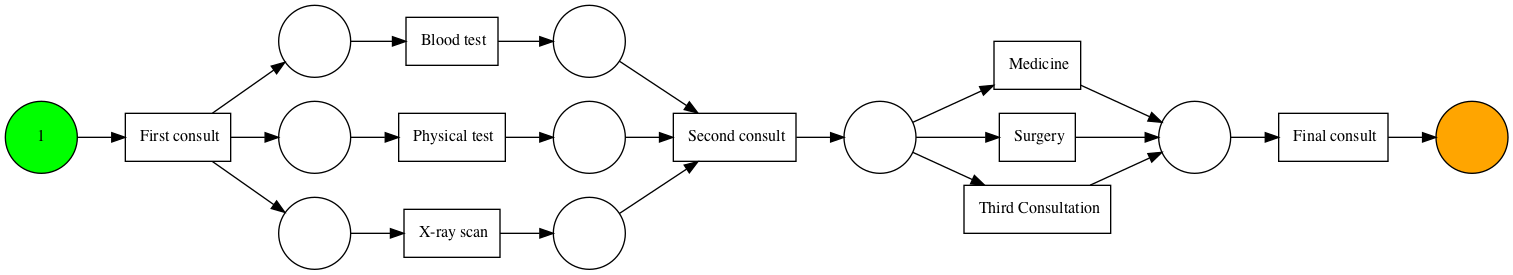

In [10]:
## Import the petrinet visualizer object
from pm4py.visualization.petrinet import visualizer as pn_visualizer

# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

In [12]:
from pm4py.algo.discovery.inductive import algorithm as inductive_miner

net, initial_marking, final_marking = inductive_miner.apply(data)

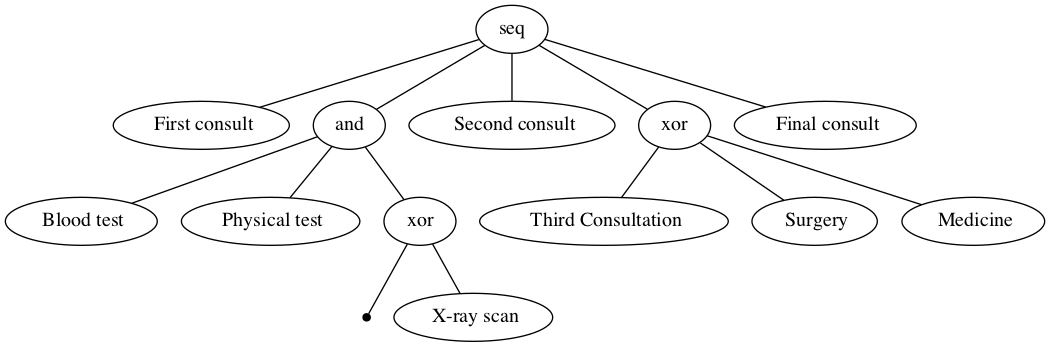

In [13]:
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.process_tree import visualizer as pt_visualizer

tree = inductive_miner.apply_tree(data)

gviz = pt_visualizer.apply(tree)
pt_visualizer.view(gviz)

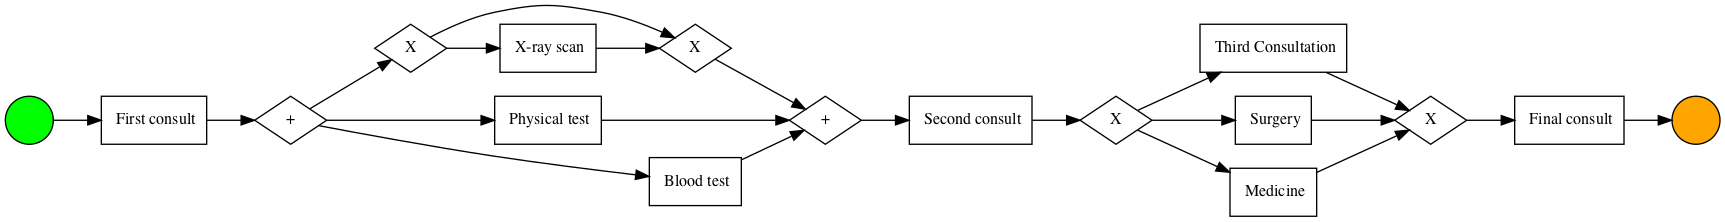

In [17]:
from pm4py.objects.conversion.process_tree import converter
tree = pm4py.discover_process_tree_inductive(data)

bpmn_graph = converter.apply(tree, variant=converter.Variants.TO_BPMN)
pm4py.view_bpmn(bpmn_graph)

In [ ]:
## from petri net to BPMN


/var/folders/wk/yjvhdpj533sgm01jhb0gwj7w0000gn/T/ipykernel_9945/441289160.py:8: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  gviz = pn_visualizer.apply(net, initial_marking, final_marking,


replaying log with TBR, completed variants ::   0%|          | 0/16 [00:00<?, ?it/s]

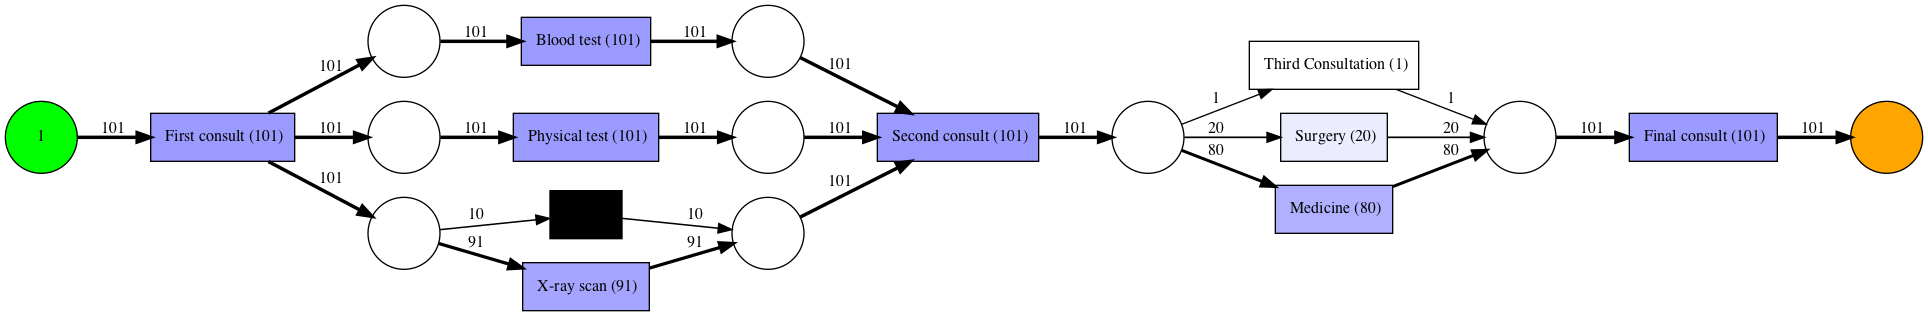

In [22]:
from pm4py.objects.conversion.process_tree import converter as pt_converter

## Either discover the petri net using inductive miner
net, initial_marking, final_marking = inductive_miner.apply(data)
## Or convert your existing model
net, initial_marking, final_marking = pt_converter.apply(tree)
## Then visualise
gviz = pn_visualizer.apply(net, initial_marking, final_marking, 
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=data)
pn_visualizer.view(gviz)